<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-I/blob/main/APPROX_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una de las mejores maneras de estimar pi es generando un circulo y calcular la probabilidad de que un dardo caiga dentro de este.

Si lo vemos de manera probabilistica nos damos cuenta que cada que un dardo este dentro del circulo se puede considerar como un éxito, por lo que podemos definir a nuestra variable de la siguiente manera:
$$
x_i =
\begin{cases}
1 & \text{si el dardo cae dentro circulo} \\
0 & \text{si cae fuera}
\end{cases}
$$
Consideremos a
$$
\hat{\pi} = \frac{4x}{N}
$$
Donde x representa el número de veces que un punto simulado cayo dentro del cuarto de circulo y N el número de veces que se realizó el experimento.

La cual podriamos decir que sigue una distribución binomial.

Ahora bien, para aproximar más el valor estimado a su valor real es necesario aumentar el número de veces que se realiza el experimento, por ejemplo, si queremos que el estimador difiera en una cantidad menor que 0.1, con una seguridad del 95% podemos expresar esto de la siguiente manera:
$$
P(|\hat{pi}-\pi| \leq 0.1 ) = 0.95
$$
La cual se puede reescribir como
$$
P(\pi - 0.1 \leq \frac{\hat{\pi}}{n} \leq \pi + 0.1) = 0.95
$$

Como mencionamos anteriormente, $\pi$ puede ser estumado utilizando la relacion $\frac{4x}{n}$  por lo tanto:

$$
P(\frac{\pi - 0.1}{4} \leq \hat{\pi} \leq \frac{\pi + 0.1}{4}) = 0.95
$$
Y puesto que x es una variable alaeatoria que sigue una distribución binomial,especialemente de Bernoulli, cuyos valor esperado y varianza esta dado por :  

$$
E[x_i] = 1*p+0*p = p \\
V[x_i] = E[x_i^2] - (E[x_i])^2 = (1^2*p + 0^2*p)-p^2 = p-p^2 = p(1-p)
$$

El teorema del límite central también se puede usar para aproximar probabilidades de algunas
variables aleatorias discretas cuando las probabilidades exactas sean difíciles de calcular. Un
ejemplo útil comprende la distribución binomial para valores grandes del número de intentos n.
Suponga que Z tiene una distribución binomial con n intentos y probabilidad de éxito p. La podemos denotar de la siguiente manera:
$$
Z = \frac{x_1 + ...+ x_N}{N}
$$
La cual se puede identificar como la fraccion de exitos

Dado lo anterior el valor esperado y varianza de la fracción de exitos ese puede obtener como sigue

*   $ E[z] = \frac{1}{N}(E[x_1]+...+E[x_N]) = \frac{np}{} = p = \frac{\pi}{4} $
*   $ V[z] = \frac{1}{N^2} (V[x_1]+...+V[x_2]) = \frac{1}{N^2}(N p(1-p)) = \frac{p(1-p)}{N} = \frac{(\pi/4)(1-\pi/4)}{n}$
Es obvio que cuando n es grande, tanto la distribución binomial como la fracción de éxitos x/n, pueden ser reemplazadas por una distribución normal. Por consiguiente el número de experimentos necesarios a realizar se puede encontrar resolviendo la siguiente ecuación

Ahora, estandaricemos la variable
$$
Z = \frac{\hat{\pi}-E[\hat{\pi}]}{V[\hat{\pi}]} =
\frac{\frac{\pi + 0.1}{4} - \frac{\pi}{4}}{\sqrt{\frac{\pi}{4}(1-\pi/4)}}\sqrt{n}
$$
Despejando el valor de n se obtiene:
$$
n = \frac{4\pi(1-\pi/4)Z_{0.25}}{(0.1)^2}
$$
De la tabla de la ditribución normal, $Z_{0.25} = 1.96$, por lo que n resulta ser de 1036.
De esta manera, para que el valor estimado de $\pi$ difiera con su valor real una cantidad menor que 0.1 es necesario simular 1036 veces el experimento.

Otra manera de resolver este caso es aplicando la desgualdad de Chevishev
$$
P(|Z_n - E[z_n]| \geq \epsilon) \leq \frac{V[Z_n]}{\epsilon^2} = \frac{16p(1-p)}{N\epsilon^2}
$$
Si sustiuimos los valores anteriores, pero buscamos que la probabilida de error sea de 0,01 obtendremos que $\textbf{N = 26000}$
Utilizaremos este ultimo para nuestra simulación.

In [75]:
#Importamos todas las librerias a utilizar
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [76]:
def muestra(): #Devuelve el numero de exitos
  exitos = 0
  u_1 = rnd.random() #Genera números aleatorios entre 0 y 1
  u_2 = rnd.random()
  if u_2 <= math.sqrt(1-u_1**2): #Comprueba si el dardo esta dentro del circulo
    exitos += 1
  return exitos

In [77]:
def prob_exito(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    e = 0                       # estimada al contar las veces que un dardo esta dentro del circulo y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        e += muestra()
        prob.append(e/(i+1))
    return prob, e

In [79]:
N = 26000 #Repetimos el experimento con el N calculado anteriormente
[X,e] = prob_exito(N)

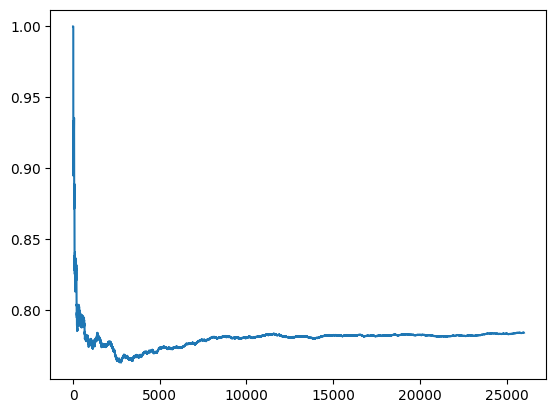

In [80]:
plt.plot(X)

In [81]:
# La aproximación se calcula con el numero de exitos, es decir, el número de veces que un dardo esta dentro del cuarto de circulo.
app = 4*(e/N)
app

3.135692307692308

In [82]:
def modelo(n):
    lista=[]
    for i in range(n):
        [s,e] = prob_exito(500)
        lista.append(np.mean(s))
    return lista

Esta grafica nos representa como cuando el n es lo suficientemente grande nuestra muestra se aproxima a una normal.

In [83]:
Y = modelo(100000)

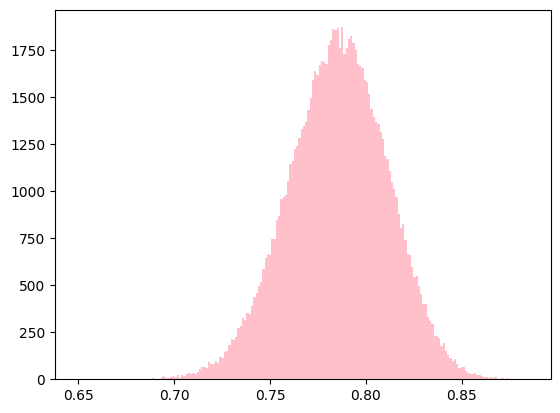

In [84]:
plt.hist(Y,bins = 200, color = "pink")
plt.show()